<center> <h1> Universidad Pólitecnica Salesiana</h1></center>
<center> <h5>Estudiante: Angel Jadan</h5></center>
<center> <h5>Fecha: 06/06/2021</h5></center>


${Introducción} $
El siguiente trabajo trata de realizar una simulación del proceso de vacunación de la parroquia Jadan, de acuerdo al nuevo plan de vacunación planteado por el presidente Guillermo Laso. 
Tomaremos como datos, el número de votantes, el número de juntas o mesas, de acuerdo la última votación de las elecciones del 2021.

Para ello utilizaremos la libreria de simpy opensource, de python que nos permite realizar una simulación con un entorno virtual, que se pude representar como una maquina, u otro objeto, en este caso lo representaremos a la mesa o punto de vacunación donde se realizó la vacunación.


### Datos

#### Numero de vacunas recibidas en el Ecuador en las 2 semanas 950 000

Ciudad electoral tomado de referencia en elecciones 2021:
 ##### - Gualaceo.
 ##### - Población: 42617
 ##### - Numero de juntas: 135
 ##### - Fuente: http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf

 ##### - Recinto electoral: Jadan
 ##### - Número de juntas/mesas: 11
 ##### - Número de votantes: 4048
 ##### - Número de votantes por junta: 368
 ##### - Fuente: https://donde-vota.com/ecuador/azuay.htm


Se tomará en cuenta los tiempos en realizar los estudios, para ver si tiene sintomas, el tiempo que toma la primera y segunda dosis, que se detallan en el siguiente listado:

*	Tomar los resultados de la regresión para la vacuna según la llegada.
*	Se tiene una promedio que el 80% de personas realizaran el proceso de vacunación dentro del Ecuador.
*	Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse.
*	Las personas solo tiene un recinto electoral para realizar el proceso.
*	Las personas realizan la primera vacuna y 30 días después la segunda vacuna.
*	La persona se acerca a la mesa  y hacen fila en caso de ser necesario para recibir la vacuna.
*	Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.
*	Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud.
*	La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.
*	La persona sale del recinto electoral.
*	Regresan para la próxima fecha y se repite el ciclo.
#### El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
* Se debe establecer un modelo basado en modelos matemáticos para la predicción del numero de veces que se compartirá o la tendencia del presidente basada en redes sociales.
* El programa deberá generar gráficas que indiquen la ecuación matemática de las tendencias .
* Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :
 - Total de de personas que realizaron el proceso de vacunación.
 - Grafico del porcentaje de personas que no recibieron la vacuna.
 - El tiempo promedio de espera.


#### Importamos las librerias a utilizarse.

In [7]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

#### Realizamos la codificación para realizar el proceso de vacunación.
Se toma como 4050 vacunas disponibles, en un tiempo de 575 que es 5 dias.

In [91]:
# Maximo de vacunas
MAX_VACUNAS = 4050
# Total de numero de puntos de vacunacion
JUNTAS = 11
PACIENTES = 4048
# Intervalo de tiempo en que llegan los pacientes
INTERVALO_LLEGADA = 5 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 575

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}
#Diccionarios para almacenar la primera y segunda dosis
dosis_1 ={}
dosis_2 = {}
#Diccionario para el numero de pacientes que no han sido atendidos
p_no_vacunado = []

#Numero de vacunas aplicadas
n_v_aplicadas = 0

#Fecha inicial 30 dias, y se suma 1 dia.
fecha_inicial =30


class Recinto(object):
    def __init__(self, environment, num_mesas, nombre):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las mesas o juntas 
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre
        
    def examen_sintomas(self, paciente, tam_no_vacunados, n_per_sintomas):
        estado = random.randint(1,2)
        # Compara para ver que el numero de personas con sintomas en el diccionario
        # sea menor o igual al porcentaje generado y
        # el estado sea igual a 1 que es con sintomas
        if tam_no_vacunados<=n_per_sintomas and estado ==1:
            p_no_vacunado.append(paciente)
            
        return estado
    
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def dosis_1(self, paciente, sintomas):
        if sintomas == 2:
            t_vacunacion = random.randint(5,10)
            yield self.env.timeout(t_vacunacion)
            print("El paciente ", paciente, " ha sido vacunado con la primera dosis.")
            print("La siguiente fecha es luego de 30 dias")
            
            dosis_1[paciente] = t_vacunacion
        else:
            print("El paciente ",paciente," tiene sintomas, por lo que no puede ser vacunado.")
    
    def dosis_2(self, paciente, sintomas):
        if sintomas ==2:
            t_vacunacion = random.randint(5,10)
            yield self.env.timeout(t_vacunacion)
            print("El paciente ",paciente, "ha sido vacunado con la segunda dosis.")
            dosis_2[paciente] = t_vacunacion
        else:
            print("El paciente ",paciente," tiene sintomas, por lo que no puede ser vacunado")
        
     #Traslado para la salida del paciente
    def generar_certificado(self,paciente):
        t_salida = random.randint(2,3)        
        yield self.env.timeout(t_salida)
        

        
def llegada_paciente(env, paciente,punto,tam_no_vacunados, n_per_sintomas):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (paciente, env.now))
 
    # Especificamos que vamos a usar un recurso (Resource) que representa # la maquina de lavado
    with punto.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s a la hora %.2f.' % (paciente,env.now))
        
        #yield env.process(punto.examen_sintomas(paciente,tam_no_vacunados, n_per_sintomas))
        sintomas = punto.examen_sintomas(paciente, tam_no_vacunados, n_per_sintomas)
        
        print("Sintomas: ",sintomas)
        if sintomas == 2:
            yield env.process(punto.dosis_1(paciente, sintomas))
            print("El paciente %s esta en proceso para la primera dosis a las  %.2f."\
                 %(paciente,env.now))
            
            yield env.process(punto.generar_certificado(paciente))
            print("Se ha generado el certificado y fecha para la segunda dosis a las %.2f. \
            para el paciente %s"\
                  %(env.now,paciente))
        if sintomas == 2:
            yield env.process(punto.dosis_2(paciente, sintomas))
            print("El paciente %s esta en proceso para la segunda dosis a las  %.2f." \
                  % (paciente,env.now))
        
 
 
def ejecutar_simulacion(env,num_mesas, pacientes,intervalo):
    recinto = Recinto(env,num_mesas,"Gualaceo")
    #Genarado randomico porcentaje entre 5% y 10%  con sintomas
    p_sintomas = random.randint(5,10)
    print("Porcentaje de personas que tienen sintomas: ",p_sintomas,"%")

    #Calculado numero de personas con sintomas
    n_per_sintomas = int(pacientes/100*p_sintomas)
    print("Numero de personas que tienen sintomas: ",n_per_sintomas)
    
    #Numero de personas no vacunadas
    tam_no_vacunados = len(p_no_vacunado)

    for i in range(pacientes):
        env.process(llegada_paciente(
            env,'Paciente-%d'%(i+1),recinto,tam_no_vacunados,n_per_sintomas))
    while True:
        
        yield env.timeout(random.randint(intervalo-2,intervalo+2))
        i+=1
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),recinto,tam_no_vacunados,n_per_sintomas))
        
print("Punto de vacunacion Cuenca")
# Creamos el entorno de simulacion
env=simpy.Environment()
print("Pacientes=> ", PACIENTES)
env.process(ejecutar_simulacion(env, JUNTAS,PACIENTES,INTERVALO))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Punto de vacunacion Cuenca
Pacientes=>  4048
Porcentaje de personas que tienen sintomas:  6 %
Numero de personas que tienen sintomas:  242
Llega el paciente: Paciente-1 a la hora 0.00.
Llega el paciente: Paciente-2 a la hora 0.00.
Llega el paciente: Paciente-3 a la hora 0.00.
Llega el paciente: Paciente-4 a la hora 0.00.
Llega el paciente: Paciente-5 a la hora 0.00.
Llega el paciente: Paciente-6 a la hora 0.00.
Llega el paciente: Paciente-7 a la hora 0.00.
Llega el paciente: Paciente-8 a la hora 0.00.
Llega el paciente: Paciente-9 a la hora 0.00.
Llega el paciente: Paciente-10 a la hora 0.00.
Llega el paciente: Paciente-11 a la hora 0.00.
Llega el paciente: Paciente-12 a la hora 0.00.
Llega el paciente: Paciente-13 a la hora 0.00.
Llega el paciente: Paciente-14 a la hora 0.00.
Llega el paciente: Paciente-15 a la hora 0.00.
Llega el paciente: Paciente-16 a la hora 0.00.
Llega el paciente: Paciente-17 a la hora 0.00.
Llega el paciente: Paciente-18 a la hora 0.00.
Llega el paciente: Pacie

Llega el paciente: Paciente-1561 a la hora 0.00.
Llega el paciente: Paciente-1562 a la hora 0.00.
Llega el paciente: Paciente-1563 a la hora 0.00.
Llega el paciente: Paciente-1564 a la hora 0.00.
Llega el paciente: Paciente-1565 a la hora 0.00.
Llega el paciente: Paciente-1566 a la hora 0.00.
Llega el paciente: Paciente-1567 a la hora 0.00.
Llega el paciente: Paciente-1568 a la hora 0.00.
Llega el paciente: Paciente-1569 a la hora 0.00.
Llega el paciente: Paciente-1570 a la hora 0.00.
Llega el paciente: Paciente-1571 a la hora 0.00.
Llega el paciente: Paciente-1572 a la hora 0.00.
Llega el paciente: Paciente-1573 a la hora 0.00.
Llega el paciente: Paciente-1574 a la hora 0.00.
Llega el paciente: Paciente-1575 a la hora 0.00.
Llega el paciente: Paciente-1576 a la hora 0.00.
Llega el paciente: Paciente-1577 a la hora 0.00.
Llega el paciente: Paciente-1578 a la hora 0.00.
Llega el paciente: Paciente-1579 a la hora 0.00.
Llega el paciente: Paciente-1580 a la hora 0.00.
Llega el paciente: P

Llega el paciente: Paciente-2735 a la hora 0.00.
Llega el paciente: Paciente-2736 a la hora 0.00.
Llega el paciente: Paciente-2737 a la hora 0.00.
Llega el paciente: Paciente-2738 a la hora 0.00.
Llega el paciente: Paciente-2739 a la hora 0.00.
Llega el paciente: Paciente-2740 a la hora 0.00.
Llega el paciente: Paciente-2741 a la hora 0.00.
Llega el paciente: Paciente-2742 a la hora 0.00.
Llega el paciente: Paciente-2743 a la hora 0.00.
Llega el paciente: Paciente-2744 a la hora 0.00.
Llega el paciente: Paciente-2745 a la hora 0.00.
Llega el paciente: Paciente-2746 a la hora 0.00.
Llega el paciente: Paciente-2747 a la hora 0.00.
Llega el paciente: Paciente-2748 a la hora 0.00.
Llega el paciente: Paciente-2749 a la hora 0.00.
Llega el paciente: Paciente-2750 a la hora 0.00.
Llega el paciente: Paciente-2751 a la hora 0.00.
Llega el paciente: Paciente-2752 a la hora 0.00.
Llega el paciente: Paciente-2753 a la hora 0.00.
Llega el paciente: Paciente-2754 a la hora 0.00.
Llega el paciente: P

Llega el paciente: Paciente-4012 a la hora 0.00.
Llega el paciente: Paciente-4013 a la hora 0.00.
Llega el paciente: Paciente-4014 a la hora 0.00.
Llega el paciente: Paciente-4015 a la hora 0.00.
Llega el paciente: Paciente-4016 a la hora 0.00.
Llega el paciente: Paciente-4017 a la hora 0.00.
Llega el paciente: Paciente-4018 a la hora 0.00.
Llega el paciente: Paciente-4019 a la hora 0.00.
Llega el paciente: Paciente-4020 a la hora 0.00.
Llega el paciente: Paciente-4021 a la hora 0.00.
Llega el paciente: Paciente-4022 a la hora 0.00.
Llega el paciente: Paciente-4023 a la hora 0.00.
Llega el paciente: Paciente-4024 a la hora 0.00.
Llega el paciente: Paciente-4025 a la hora 0.00.
Llega el paciente: Paciente-4026 a la hora 0.00.
Llega el paciente: Paciente-4027 a la hora 0.00.
Llega el paciente: Paciente-4028 a la hora 0.00.
Llega el paciente: Paciente-4029 a la hora 0.00.
Llega el paciente: Paciente-4030 a la hora 0.00.
Llega el paciente: Paciente-4031 a la hora 0.00.
Llega el paciente: P

El paciente  Paciente-151 ha sido vacunado con la segunda dosis.
El paciente  Paciente-157  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-158  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-151 esta en proceso para la segunda dosis a las  116.00.
El paciente Paciente-157 esta en proceso para la primera dosis a las  116.00.
El paciente Paciente-158 esta en proceso para la primera dosis a las  116.00.
Se ha generado el certificado y fecha para la segunda dosis a las 116.00.             para el paciente Paciente-156
Se traslada el paciente: Paciente-171 a la hora 116.00.
Sintomas:  2
El paciente  Paciente-159  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-165  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-159 esta en proceso para la primera dosis a las  117.00.
El paciente Pacien

La siguiente fecha es luego de 30 dias
El paciente Paciente-289 esta en proceso para la primera dosis a las  238.00.
El paciente Paciente-302 esta en proceso para la primera dosis a las  238.00.
Se ha generado el certificado y fecha para la segunda dosis a las 239.00.             para el paciente Paciente-296
El paciente  Paciente-297  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-299  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-304  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-310  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-297 esta en proceso para la primera dosis a las  240.00.
El paciente Paciente-299 esta en proceso para la primera dosis a las  240.00.
El paciente Paciente-304 esta en proceso para la primera dosis a las  240.00.
El paciente Paciente-310 esta en pr

El paciente  Paciente-464  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-457 ha sido vacunado con la segunda dosis.
El paciente  Paciente-465  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-464 esta en proceso para la primera dosis a las  370.00.
El paciente Paciente-457 esta en proceso para la segunda dosis a las  370.00.
El paciente Paciente-465 esta en proceso para la primera dosis a las  370.00.
Se ha generado el certificado y fecha para la segunda dosis a las 370.00.             para el paciente Paciente-459
Se ha generado el certificado y fecha para la segunda dosis a las 370.00.             para el paciente Paciente-460
Se ha generado el certificado y fecha para la segunda dosis a las 370.00.             para el paciente Paciente-462
Se traslada el paciente: Paciente-474 a la hora 370.00.
Sintomas:  1
Se traslada el paciente: Paciente-475 a la hora 370.00.
Sintomas:  1
Se tr

Sintomas:  2
Se traslada el paciente: Paciente-616 a la hora 498.00.
Sintomas:  2
El paciente  Paciente-598 ha sido vacunado con la segunda dosis.
El paciente Paciente-598 esta en proceso para la segunda dosis a las  499.00.
Se traslada el paciente: Paciente-617 a la hora 499.00.
Sintomas:  1
Se traslada el paciente: Paciente-618 a la hora 499.00.
Sintomas:  2
El paciente  Paciente-596 ha sido vacunado con la segunda dosis.
El paciente Paciente-596 esta en proceso para la segunda dosis a las  500.00.
Se traslada el paciente: Paciente-619 a la hora 500.00.
Sintomas:  2
Se ha generado el certificado y fecha para la segunda dosis a las 501.00.             para el paciente Paciente-611
El paciente  Paciente-606 ha sido vacunado con la segunda dosis.
El paciente Paciente-606 esta en proceso para la segunda dosis a las  502.00.
Se traslada el paciente: Paciente-620 a la hora 502.00.
Sintomas:  2
El paciente  Paciente-605 ha sido vacunado con la segunda dosis.
El paciente  Paciente-608 ha sid

#### Reporte de el número de personas vacunadas con la primera y segunda dosis.

In [92]:
print("Total de población: ",PACIENTES)
print("Número de pacientes que recibieron la primera dosis: ",len(dosis_1))
print("Número de pacientes que recibieron la segunda dosis: ",len(dosis_2))
print("Número de pacientes que no recibierón la primera dosis: ", PACIENTES-len(dosis_1))
print("Número de pacientes que no recibierón la segunda dosis: ", PACIENTES-len(dosis_2))

Total de población:  4048
Número de pacientes que recibieron la primera dosis:  363
Número de pacientes que recibieron la segunda dosis:  355
Número de pacientes que no recibierón la primera dosis:  3685
Número de pacientes que no recibierón la segunda dosis:  3693


#### Reporte en graficas, para el tiempo que se toma en poner el poner la primera dosis de vacunas

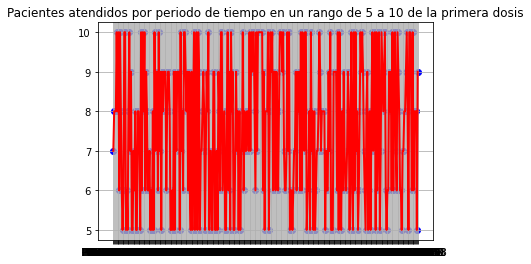

In [99]:
#x = list(dosis_1.keys())
#y = list(dosis_1.values())
datos=sorted(dosis_1.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Pacientes atendidos por periodo de tiempo en un rango de 5 a 10 de la primera dosis")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico


#### Reporte en graficas, para el tiempo que se toma en poner el poner la segunda dosis de vacunas

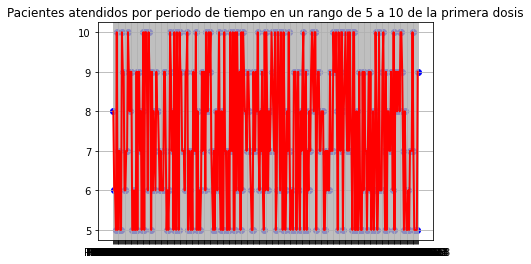

In [94]:
x2 = list(dosis_2.keys())
y2 = list(dosis_2.values())

pp.plot(x2,y2,linewidth=2,color='red')
pp.scatter(x2,y2,color='blue')
pp.title("Pacientes atendidos por periodo de tiempo en un rango de 5 a 10 de la primera dosis")
pp.grid(True)
pp.show()

Referencias: [1] https://donde-vota.com/ecuador/azuay.htm
[2] https://simpy.readthedocs.io/en/latest/topical_guides/simpy_basics.html?__cf_chl_captcha_tk__=5f124de43fcafbfdfd6d1e13b5ed833a2f898478-1622951417-0-AdZBL6-k-3R4l8QiESKcbQO8NNM0sqfcWepZKve1agdQlDZxwSOfLMgLAQ36AcugE178tYtM2ua_c4Wzltqk1Tlt5uMbnoh38KmhhS-Bya-dEth5Ea4T70wM3ZUdxhK1VRAhkUTwp7VNB4Kxh-MqWb764nQ3b5GyefghAl-a9L7C2psOEZwP1lJDBIzyU9lZR5BI-b3vUwKV4ewae0t6zbKNuy00MRsF3cktpKld79Yba2ORsEr1mUqUOvStdG500Ictfn8jlB9tpkSj4oeJnGH8xknZ4ebELypFiwB8XuopD2Xxb4Kfxn1eWGAgCd0Pmx4dpWKD8L-BxyIRVrTTHOSiu1s_t5LuWaqTMfvmJNwDgvqM2fbAwFWkt14IZONEDZWCyh7lAKcis-6oq_EkDDvG8DLTcBxws-IUTwamfkn71bf2jVTivL8kWTcIKgeOfU2FtbBr2nuEwHLkZ21Ci9-wq4BZjL94JW4rzBxb32jZUz-mRc7trKcldEfur8GvSehpXGsvEG7UBDWoueAUuoaxAnM1r98arZXBP4I85_gSi3CmqNGltU6iL3f90GueglJeKKXyPtI-Drlq9SCNW9ThQyN1RT6mpOEIPZxFsd-Q8ZvnVTKbfKulLGL77_LhJSJw7gloQzkBNLKt8cYGlmXoI2Afz9kxeeB3j-AVNmXa